In [1440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import math
from sklearn.metrics import mean_squared_error

In [1441]:
# Cargamos los database con los datos necesarios para realizar el análisis.
df= pd.read_csv('fifa21_male2.csv')

C:\Users\aguva\AppData\Local\Temp\ipykernel_1948\1917736945.py:2: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('fifa21_male2.csv')


In [1442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [1443]:
df.shape

(17125, 107)

In [1444]:
df.sample()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
4105,203002,Kim Kee Hee,30,69,Korea Republic,Ulsan Hyundai FC,69,CB,CB RB,https://cdn.sofifa.com/players/203/002/20_120.png,...,67+2,67+2,65+2,66+2,69+0,69+0,69+0,66+2,17+2,Male


In [1445]:
import pandas as pd

# Ruta del archivo CSV
csv_file = 'fifa21_male2.csv'

# Columnas que deseas seleccionar
columnas_seleccionadas = ['Age', 'Nationality', 'BP', 'OVA', 'Height', 'Weight', 'foot', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 
'Short Passing', 'Ball Control', 'Acceleration', 'Reactions', 'Stamina', 'Defending', 'Vision']

# Leer el archivo CSV y seleccionar las columnas deseadas
df = pd.read_csv(csv_file, usecols= columnas_seleccionadas)

# Imprimir el DataFrame con las columnas seleccionadas
print(df)


       Age  OVA            Nationality   BP Height  Weight   foot  Value  \
0       33   69                  Italy  LWB   6'0"  181lbs   Left  €625K   
1       37   71                  Spain   CM  5'10"  143lbs  Right  €600K   
2       33   71                England  CAM   5'9"  161lbs  Right  €1.1M   
3       36   68  Trinidad &amp; Tobago   ST  5'11"  165lbs  Right     €0   
4       36   81                  Spain  CAM   5'7"  150lbs  Right  €5.5M   
...    ...  ...                    ...  ...    ...     ...    ...    ...   
17120   22   64                 France   CB   6'6"  165lbs  Right  €550K   
17121   18   56                  Wales  CAM  5'10"  170lbs  Right  €130K   
17122   18   56                England   RB   5'9"  154lbs  Right  €130K   
17123   20   62     Bosnia Herzegovina   RB   5'9"  148lbs  Right  €475K   
17124   18   59                  Spain   ST  5'10"  154lbs  Right  €325K   

       Wage Release Clause  ... Attacking  Crossing  Finishing  Short Passing  \
0     

In [1446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17125 non-null  int64  
 1   OVA             17125 non-null  int64  
 2   Nationality     17125 non-null  object 
 3   BP              17125 non-null  object 
 4   Height          17125 non-null  object 
 5   Weight          17125 non-null  object 
 6   foot            17125 non-null  object 
 7   Value           17125 non-null  object 
 8   Wage            17125 non-null  object 
 9   Release Clause  17125 non-null  object 
 10  Contract        17125 non-null  object 
 11  Attacking       17125 non-null  int64  
 12  Crossing        17125 non-null  int64  
 13  Finishing       17125 non-null  int64  
 14  Short Passing   17125 non-null  int64  
 15  Ball Control    17125 non-null  int64  
 16  Acceleration    17125 non-null  int64  
 17  Reactions       17125 non-null 

In [1447]:
# Buscamos los valores unicos de las conlumnas categoricas para saber que tamaño pueden llegar a tener nuestra dummies.
num_val_uni_Nat = df['Nationality'].nunique()
num_val_uni_BP = df['BP'].nunique()


print('Valores unicos de Natinality son', num_val_uni_Nat)
print('Valores unicos de BP son', num_val_uni_BP)



Valores unicos de Natinality son 167
Valores unicos de BP son 15


In [1448]:
# Vemos que la columna 'Contract' no aporta valor a nuestro análisis, la quitamos junto con 'Nationality' por su gran cantidad de valores únicos.

df = df.drop(['Contract', 'Nationality'], axis=1)


In [1449]:
df.sample()

,Age,OVA,BP,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending
10075,20,63,GK,"6'2""",168lbs,Right,€500K,€850,€975K,78,14,11,30,31,36,46,31,37.0,37


In [1450]:
# Suponiendo que tienes un DataFrame llamado df con una columna llamada 'Value'

# Convierte la columna 'Value' a tipo string
df['Value'] = df['Value'].astype(str)

# Define una función personalizada para transformar los valores monetarios en representación numérica
def transformar_valor_monetario(valor):
    if 'K' in valor:
        # Valor en miles
        return float(valor.replace('K', '')) * 1000
    elif 'M' in valor:
        # Valor en millones
        return float(valor.replace('M', '')) * 1000000
    else:
        # Valor sin sufijo, asumir valor en unidades
        return float(valor)

# Aplica la función personalizada a la columna 'Value' para transformar los valores monetarios
df['Value'] = df['Value'].str.replace('€', '')  # Elimina el símbolo de euro si está presente
df['Value'] = df['Value'].apply(transformar_valor_monetario)
df['Wage'] = df['Wage'].str.replace('€', '')  # Elimina el símbolo de euro si está presente
df['Wage'] = df['Wage'].apply(transformar_valor_monetario)
df['Release Clause'] = df['Release Clause'].str.replace('€', '')  # Elimina el símbolo de euro si está presente
df['Release Clause'] = df['Release Clause'].apply(transformar_valor_monetario)

df

,Age,OVA,BP,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending
0,33,69,LWB,"6'0""",181lbs,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,66.0,208
1,37,71,CM,"5'10""",143lbs,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,73.0,153
2,33,71,CAM,"5'9""",161lbs,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,74.0,99
3,36,68,ST,"5'11""",165lbs,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,NaN,75
4,36,81,CAM,"5'7""",150lbs,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,93.0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,"6'6""",165lbs,Right,550000.0,2000.0,0.0,197,35,23,47,56,52,48,59,29.0,198
17121,18,56,CAM,"5'10""",170lbs,Right,130000.0,3000.0,273000.0,248,50,43,64,54,61,54,53,53.0,132
17122,18,56,RB,"5'9""",154lbs,Right,130000.0,2000.0,273000.0,218,55,34,42,47,66,59,53,45.0,163
17123,20,62,RB,"5'9""",148lbs,Right,475000.0,3000.0,784000.0,223,62,26,60,57,72,56,57,56.0,180


In [1451]:
df

,Age,OVA,BP,Height,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending
0,33,69,LWB,"6'0""",181lbs,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,66.0,208
1,37,71,CM,"5'10""",143lbs,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,73.0,153
2,33,71,CAM,"5'9""",161lbs,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,74.0,99
3,36,68,ST,"5'11""",165lbs,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,NaN,75
4,36,81,CAM,"5'7""",150lbs,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,93.0,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,"6'6""",165lbs,Right,550000.0,2000.0,0.0,197,35,23,47,56,52,48,59,29.0,198
17121,18,56,CAM,"5'10""",170lbs,Right,130000.0,3000.0,273000.0,248,50,43,64,54,61,54,53,53.0,132
17122,18,56,RB,"5'9""",154lbs,Right,130000.0,2000.0,273000.0,218,55,34,42,47,66,59,53,45.0,163
17123,20,62,RB,"5'9""",148lbs,Right,475000.0,3000.0,784000.0,223,62,26,60,57,72,56,57,56.0,180


In [1452]:
# Quitamos las unidades de medida 
df['Weight'] = df['Weight'].replace({'lbs': ''}, regex=True)
df[['pies', 'pulgadas']] = df['Height'].str.split("'", expand=True)
df['pulgadas'] = df['pulgadas'].replace({'"': ''}, regex=True)

# Convierte la columna 'Weight' a tipo int
df['Weight'] = df['Weight'].astype(float)
df['pies'] = df['pies'].astype(int)
df['pulgadas'] = df['pulgadas'].astype(int)

# Convertimos el peso en libras a kilogramos 
df['Weight'] = (df['Weight'] * 0.45359237).round(0)
df['Altura'] = ((df['pies'] * 30.48) + df['pulgadas'] * 2.54).round(0)



In [1453]:
# Quitamos las columnas que modificamos

df = df.drop(['Height', 'pies', 'pulgadas' ], axis=1)

In [1454]:
df.head()

,Age,OVA,BP,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending,Altura
0,33,69,LWB,82.0,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,66.0,208,183.0
1,37,71,CM,65.0,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,73.0,153,178.0
2,33,71,CAM,73.0,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,74.0,99,175.0
3,36,68,ST,75.0,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,NaN,75,180.0
4,36,81,CAM,68.0,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,93.0,181,170.0


In [1455]:
# Reordenamos las columnas para continuar con una logica

new_order = ['Age',	'BP', 'Altura',	'Weight', 'foot', 'Value',	'Wage',	'Release Clause',	'Attacking',	'Crossing',	'Finishing',	'Short Passing',	'Ball Control',	'Acceleration',	'Reactions',	'Stamina',	'Vision',	'Defending','OVA']

df = df.reindex(columns=new_order)

In [1456]:
df.head()

,Age,BP,Altura,Weight,foot,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending,OVA
0,33,LWB,183.0,82.0,Left,625000.0,7000.0,0.0,313,75,50,71,71,68,69,69,66.0,208,69
1,37,CM,178.0,65.0,Right,600000.0,7000.0,1100000.0,337,68,64,76,71,56,65,64,73.0,153,71
2,33,CAM,175.0,73.0,Right,1100000.0,15000.0,0.0,337,80,64,77,78,48,59,29,74.0,99,71
3,36,ST,180.0,75.0,Right,0.0,0.0,0.0,264,54,70,80,77,59,55,51,NaN,75,68
4,36,CAM,170.0,68.0,Right,5500000.0,12000.0,7200000.0,367,75,69,90,90,61,75,58,93.0,181,81


In [1457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17125 non-null  int64  
 1   BP              17125 non-null  object 
 2   Altura          17125 non-null  float64
 3   Weight          17125 non-null  float64
 4   foot            17125 non-null  object 
 5   Value           17125 non-null  float64
 6   Wage            17125 non-null  float64
 7   Release Clause  17125 non-null  float64
 8   Attacking       17125 non-null  int64  
 9   Crossing        17125 non-null  int64  
 10  Finishing       17125 non-null  int64  
 11  Short Passing   17125 non-null  int64  
 12  Ball Control    17125 non-null  int64  
 13  Acceleration    17125 non-null  int64  
 14  Reactions       17125 non-null  int64  
 15  Stamina         17125 non-null  int64  
 16  Vision          17067 non-null  float64
 17  Defending       17125 non-null 

In [1458]:
# Eliminamos las filas nulas de Vision unica columnas con nulos

df = df.dropna(subset=['Vision'])


In [1459]:
df._get_numeric_data().describe()

,Age,Altura,Weight,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Short Passing,Ball Control,Acceleration,Reactions,Stamina,Vision,Defending,OVA
count,17067.000000,17067.000000,17067.000000,1.706700e+04,17067.000000,1.706700e+04,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000,17067.000000
mean,25.255698,181.146364,75.135583,2.576102e+06,10568.723267,4.589991e+06,258.614461,51.604090,47.938712,60.496397,60.623191,65.441202,62.912697,63.305853,55.443605,141.631511,66.952481
std,4.930444,6.848208,7.175253,5.379656e+06,21172.345604,1.035257e+07,72.280434,17.870561,19.380748,13.948593,15.862839,14.667948,9.022226,15.323553,13.730080,61.581678,6.841916
min,16.000000,155.000000,50.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,6.000000,3.000000,7.000000,5.000000,12.000000,24.000000,11.000000,10.000000,20.000000,45.000000
25%,21.000000,175.000000,70.000000,3.750000e+05,1000.000000,5.190000e+05,232.000000,41.000000,33.000000,56.000000,57.000000,58.000000,57.000000,56.000000,47.000000,84.000000,62.000000
50%,25.000000,180.000000,75.000000,8.000000e+05,3000.000000,1.300000e+06,271.000000,56.000000,52.000000,63.000000,64.000000,68.000000,63.000000,66.000000,57.000000,158.000000,67.000000
75%,29.000000,185.000000,80.000000,2.400000e+06,11000.000000,3.900000e+06,306.000000,65.000000,63.500000,69.000000,70.000000,75.000000,69.000000,73.000000,65.000000,194.000000,72.000000
max,53.000000,206.000000,110.000000,1.055000e+08,560000.000000,2.031000e+08,437.000000,94.000000,95.000000,94.000000,96.000000,97.000000,95.000000,97.000000,95.000000,272.000000,93.000000


In [1460]:
# Seleccionamos los datos categoricos y los visualizamos
df_obj= df.select_dtypes(object)

df_obj


,BP,foot
0,LWB,Left
1,CM,Right
2,CAM,Right
4,CAM,Right
5,RW,Right
...,...,...
17120,CB,Right
17121,CAM,Right
17122,RB,Right
17123,RB,Right


In [1461]:
# Seleccionamos los datos numericos y los visualizamos
df_num= df.select_dtypes(np.number)

df_num.columns

Index(['Age', 'Altura', 'Weight', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Short Passing', 'Ball Control',
       'Acceleration', 'Reactions', 'Stamina', 'Vision', 'Defending', 'OVA'],
      dtype='object')

<Axes: >

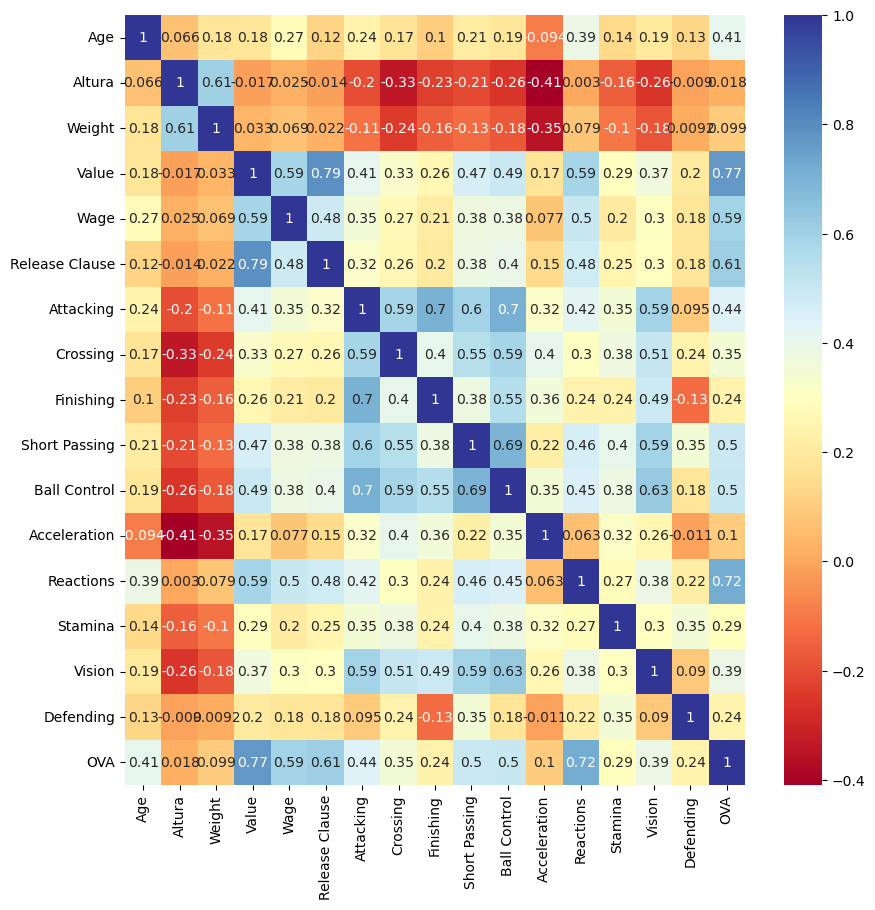

In [1462]:
# Realizamos un heatmap para observar la correlación

corr_matrix= df_num.corr(method= 'kendall')

# Crear el heatmap
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según tus necesidades
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')

# Mas alla de que exista una correlación alta entre la altura, el peso y la aceleración considero que es necesaria para la aplicacion del modelo.


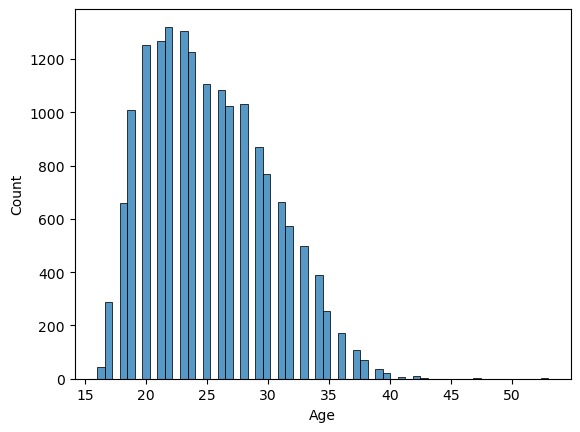

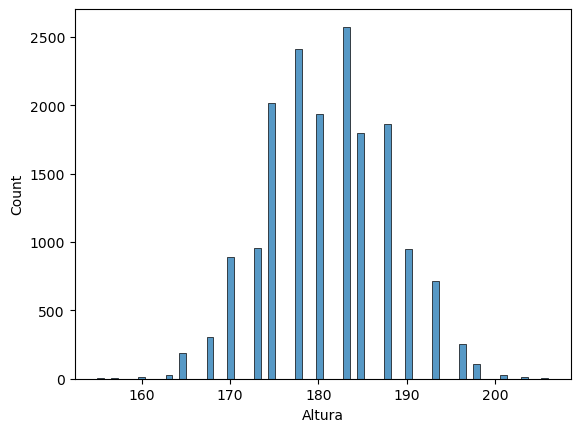

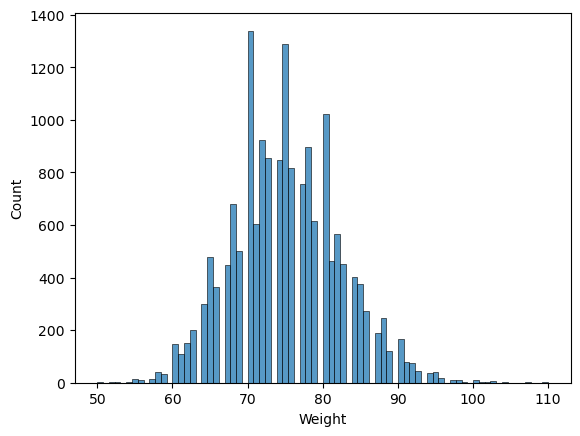

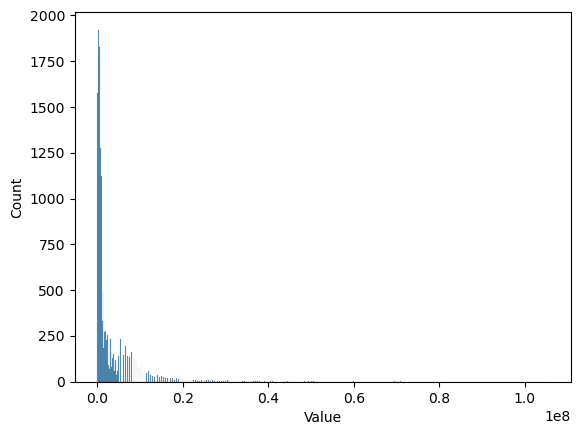

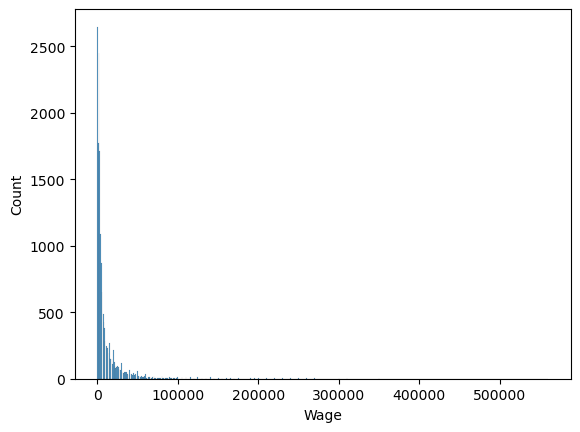

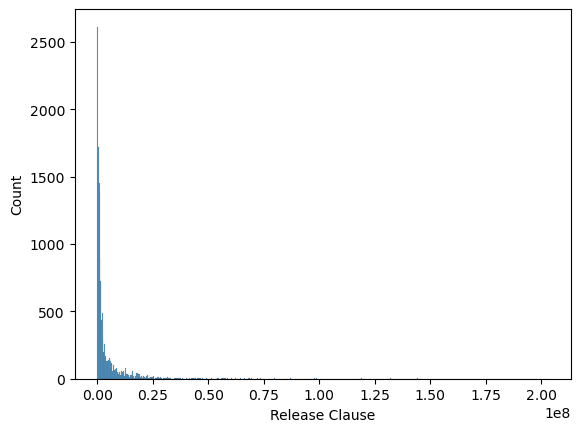

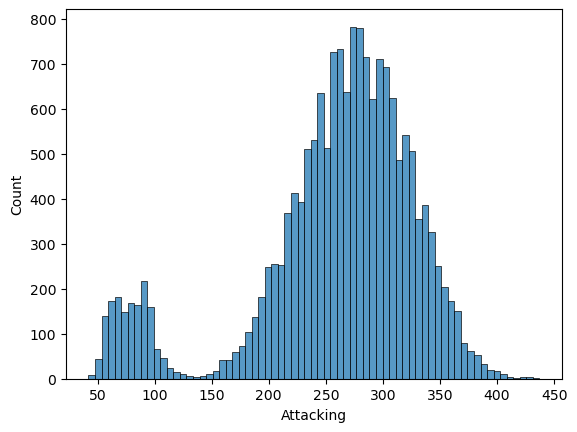

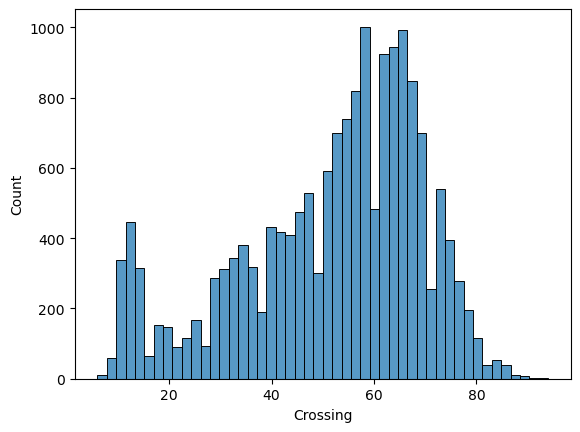

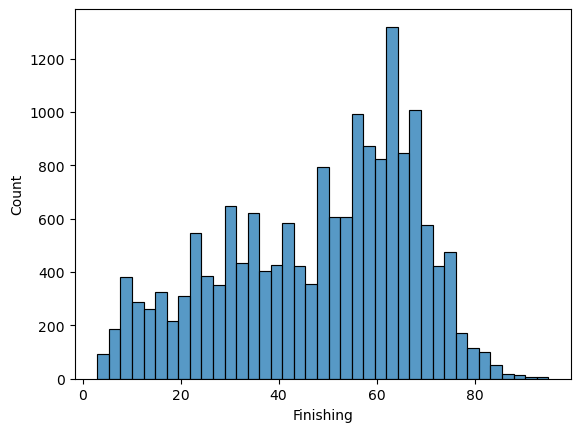

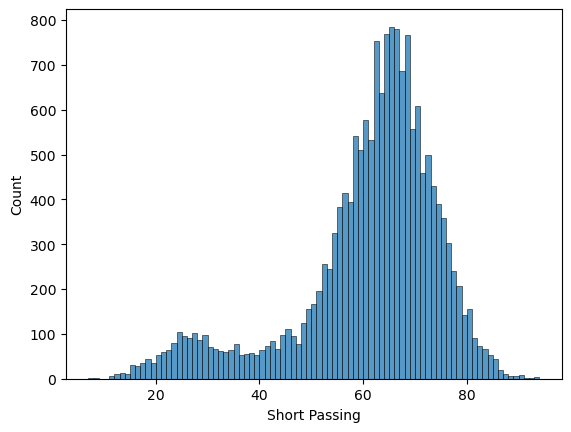

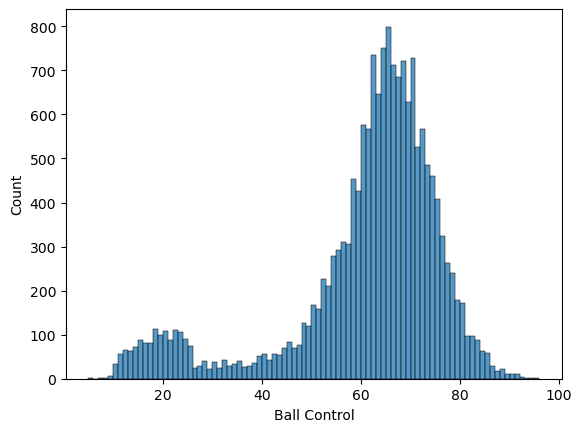

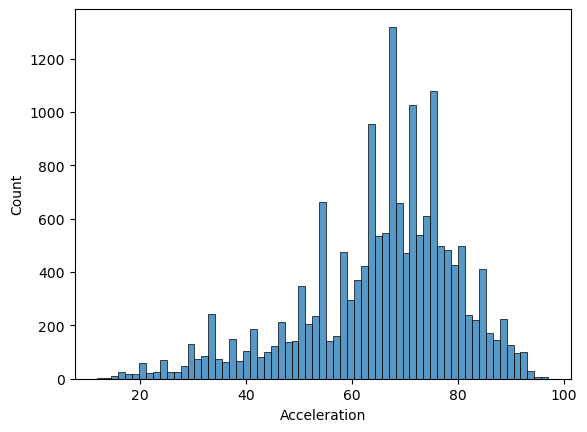

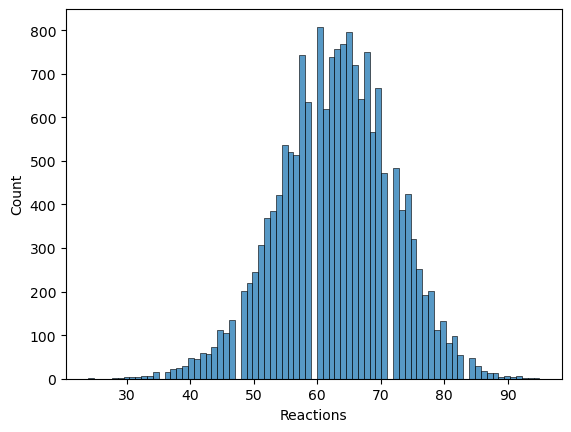

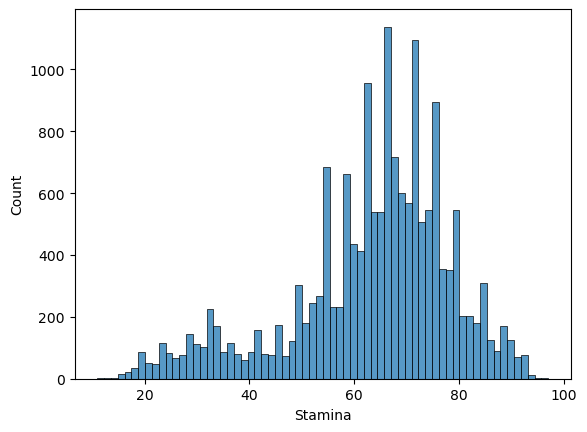

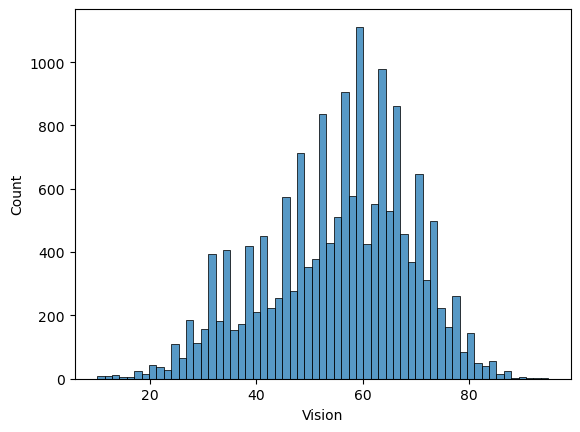

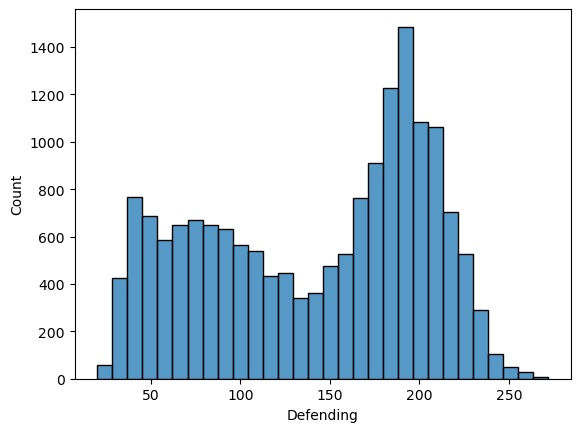

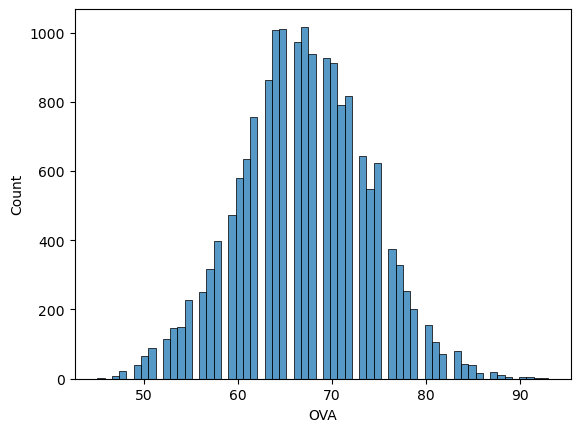

In [1463]:
# Creamos los gráficos de distribución de las variables numericas

for column in df_num.columns:
    sns.histplot(df_num[column])
    plt.show()

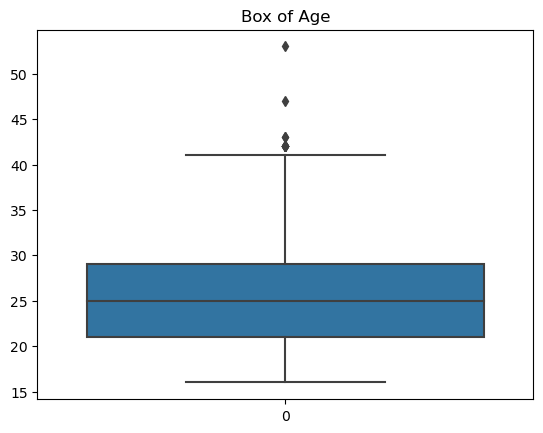

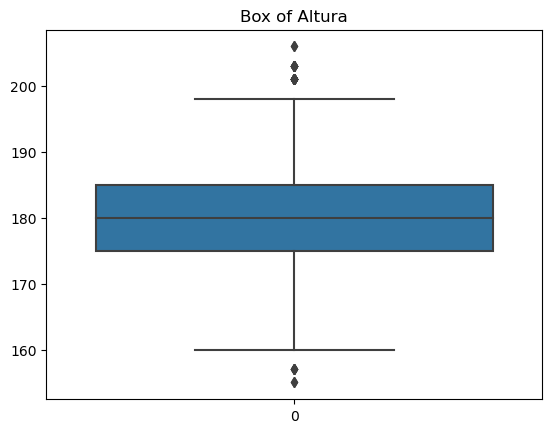

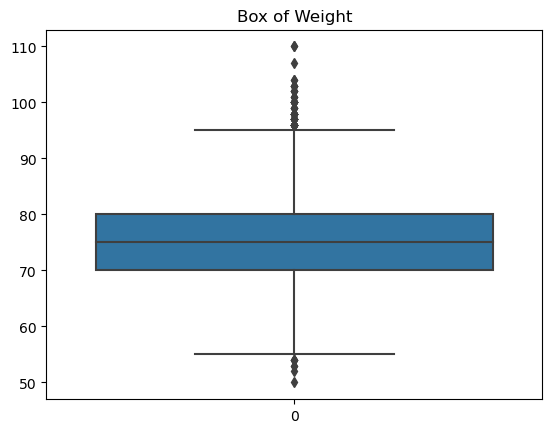

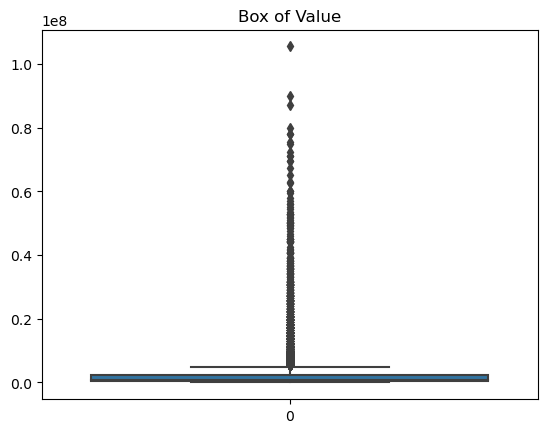

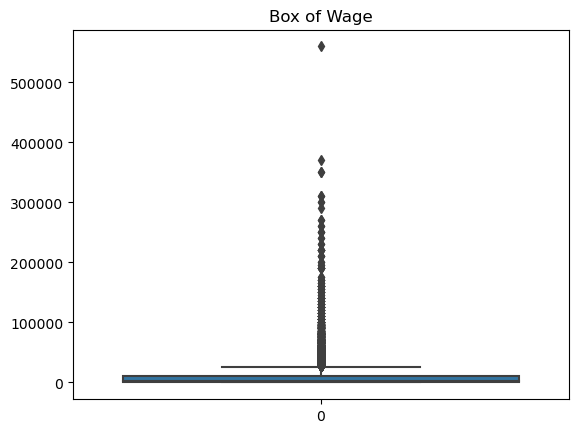

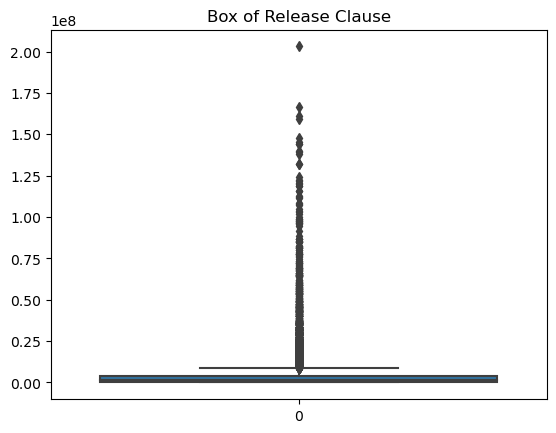

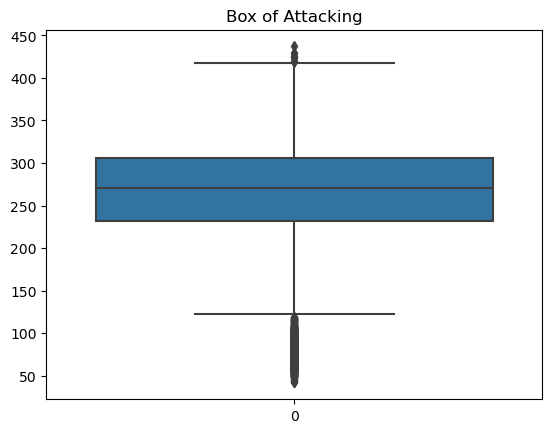

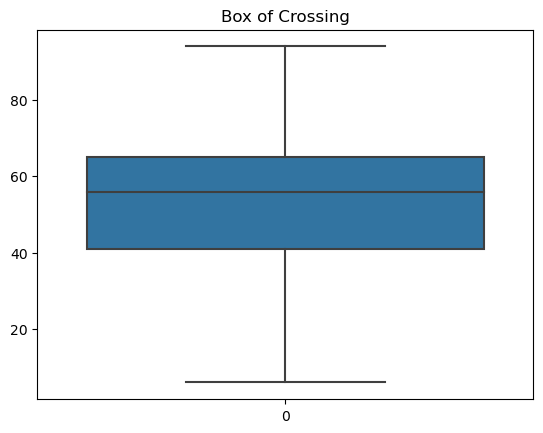

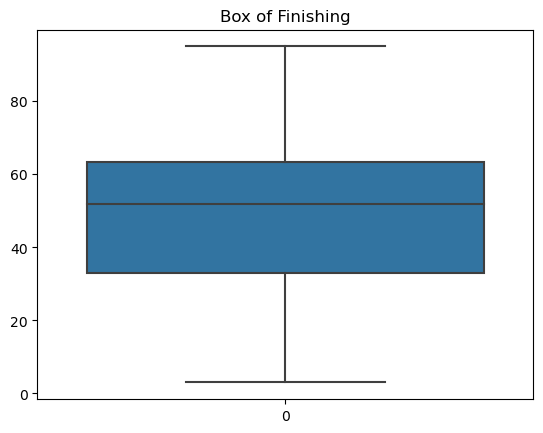

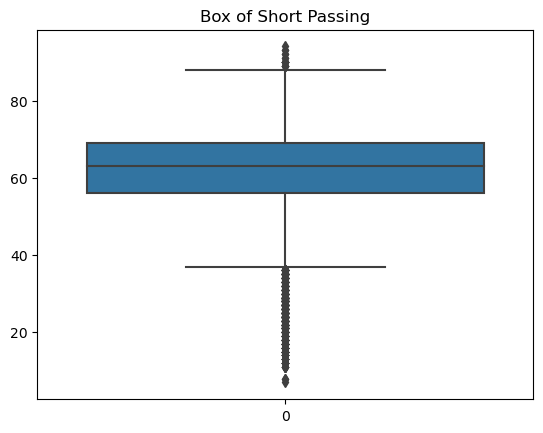

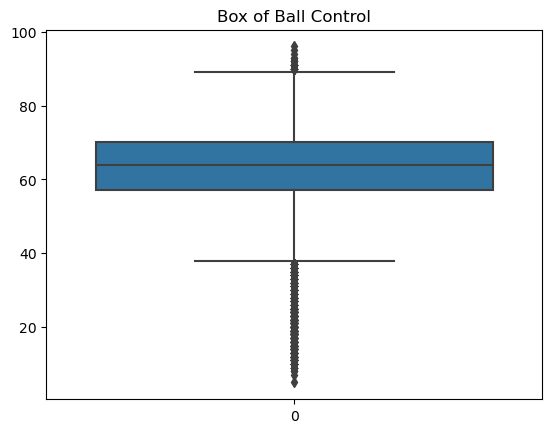

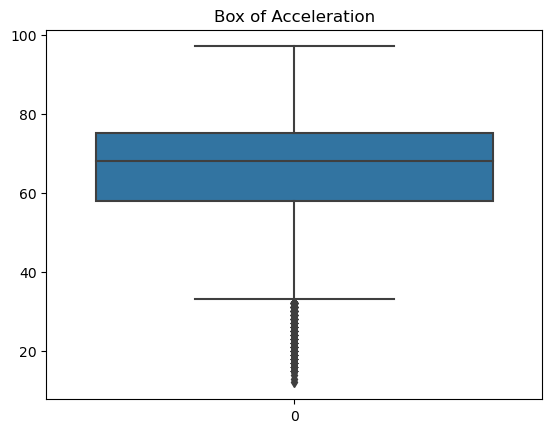

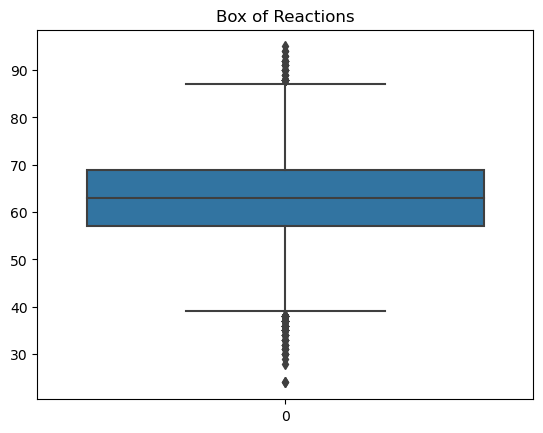

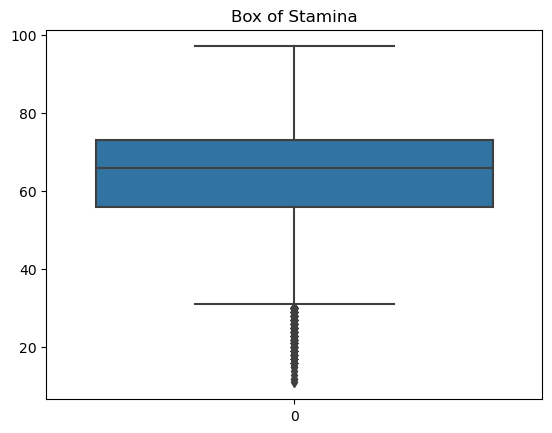

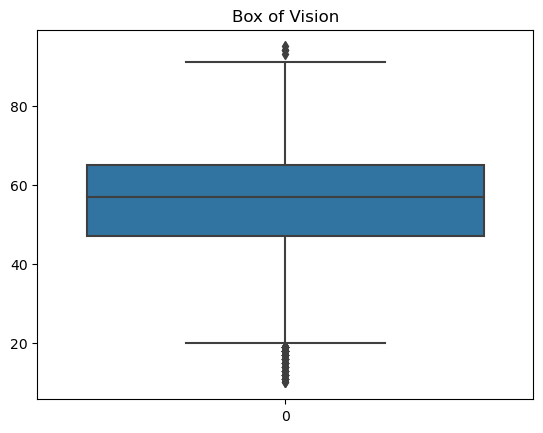

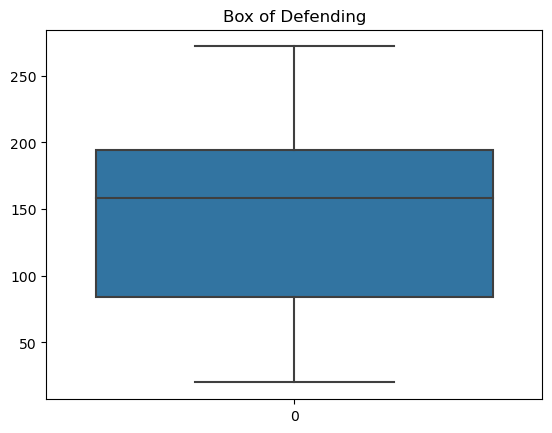

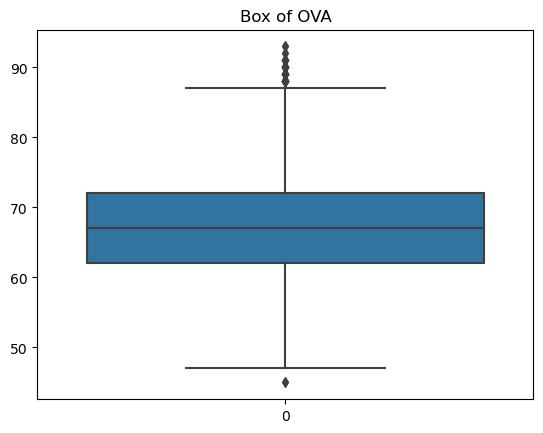

In [1464]:
#Creamos los graficos de Boxplot para visualizar los outliders que tenemos por cada una de las columnas numericas con el objetivo de mejorar nuestro DataFrame
for column in df_num.columns:
    sns.boxplot(df_num[column])
    plt.title(f"Box of {column}")
    plt.show()

In [1465]:
df_num.columns

Index(['Age', 'Altura', 'Weight', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Crossing', 'Finishing', 'Short Passing', 'Ball Control',
       'Acceleration', 'Reactions', 'Stamina', 'Vision', 'Defending', 'OVA'],
      dtype='object')

Normalizamos los datos para eliminar las difrencias de escala entre las variables ya que facilita la comprensión y el análisis de datos.

            Age    Altura    Weight     Value      Wage  Release Clause  \
0      0.459459  0.549020  0.533333  0.005924  0.012500        0.000000   
1      0.567568  0.450980  0.250000  0.005687  0.012500        0.005416   
2      0.459459  0.392157  0.383333  0.010427  0.026786        0.000000   
3      0.540541  0.294118  0.300000  0.052133  0.021429        0.035451   
4      0.297297  0.352941  0.400000  0.006872  0.008929        0.000000   
...         ...       ...       ...       ...       ...             ...   
17062  0.162162  0.843137  0.416667  0.005213  0.003571        0.000000   
17063  0.054054  0.450980  0.450000  0.001232  0.005357        0.001344   
17064  0.054054  0.392157  0.333333  0.001232  0.003571        0.001344   
17065  0.108108  0.392157  0.283333  0.004502  0.005357        0.003860   
17066  0.054054  0.450980  0.333333  0.003081  0.003571        0.003880   

       Attacking  Crossing  Finishing  Short Passing  Ball Control  \
0       0.686076  0.784091   

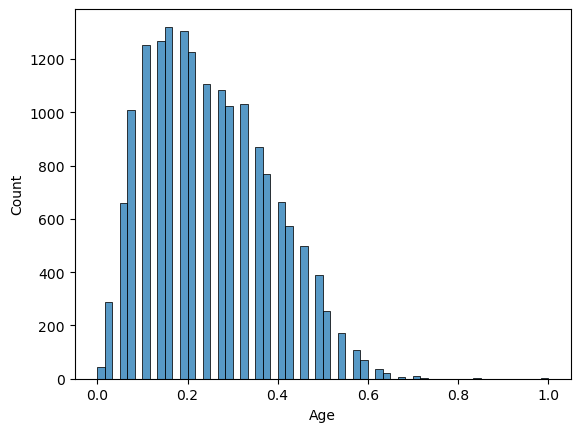

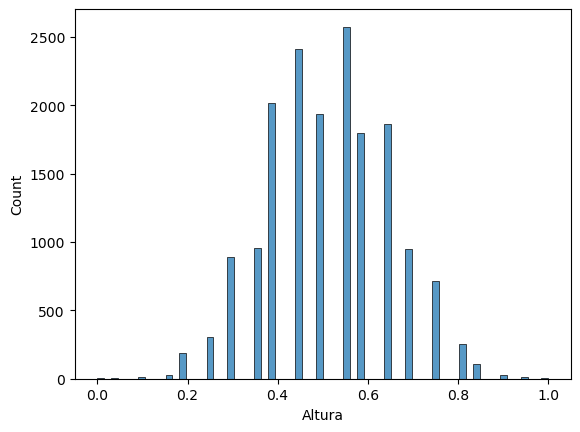

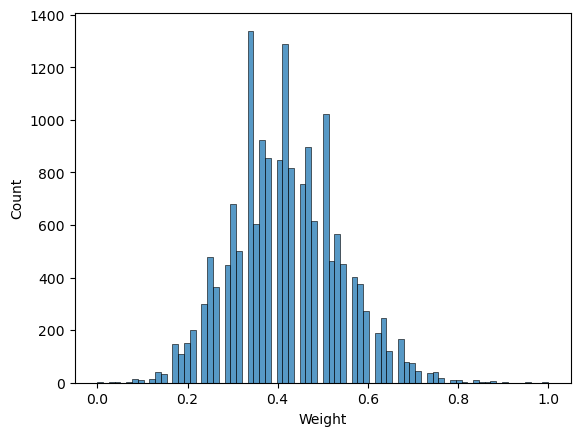

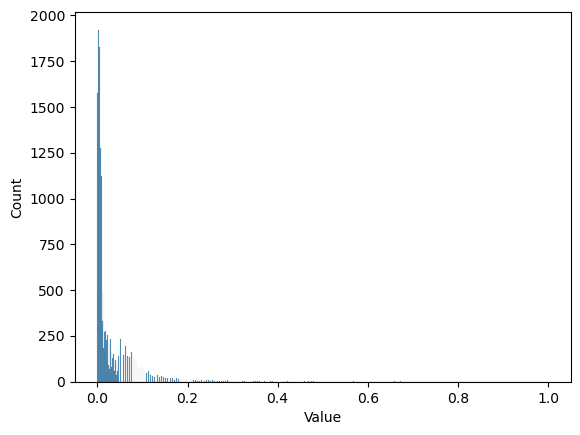

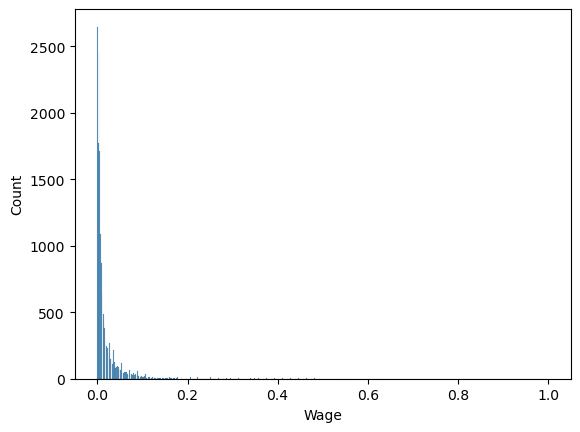

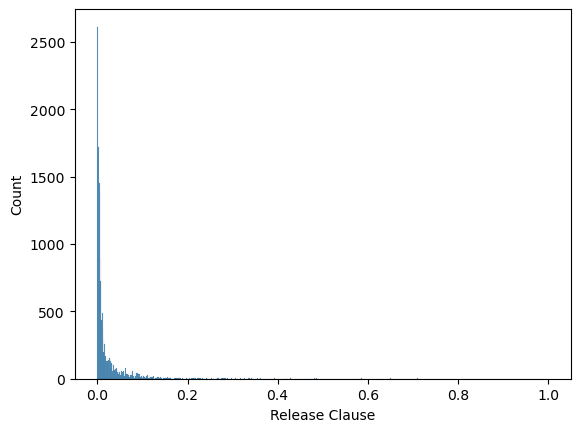

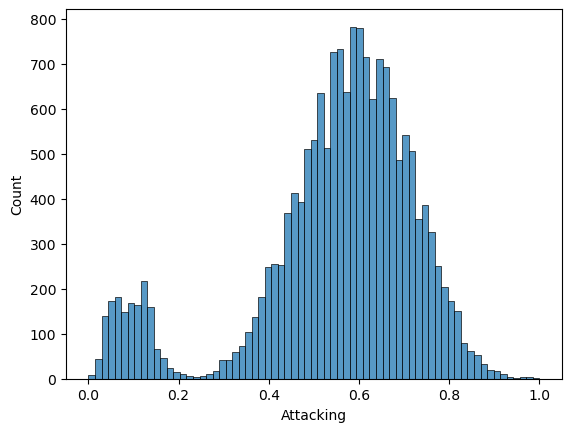

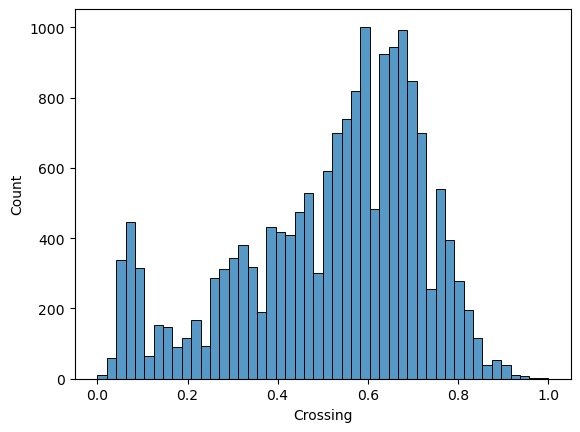

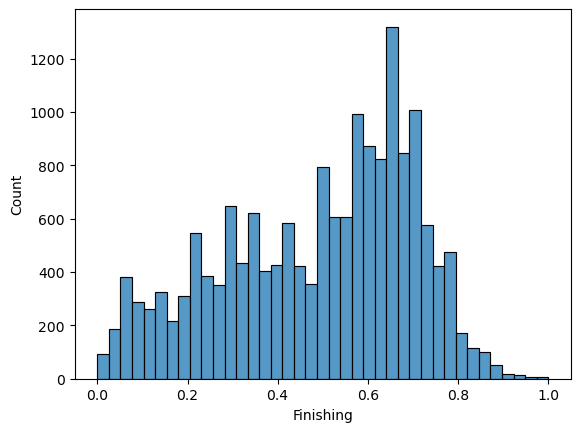

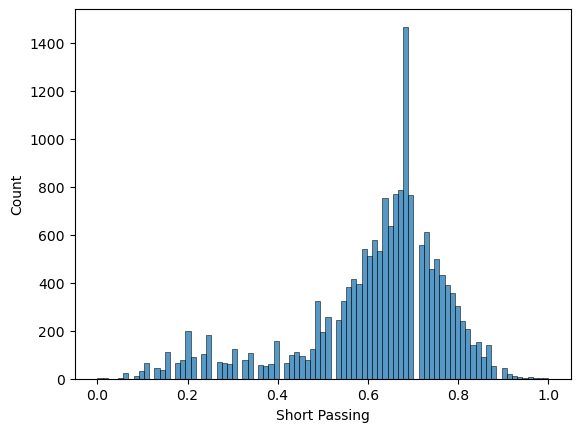

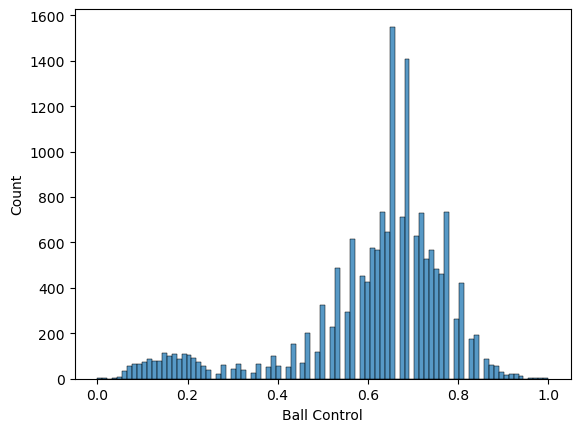

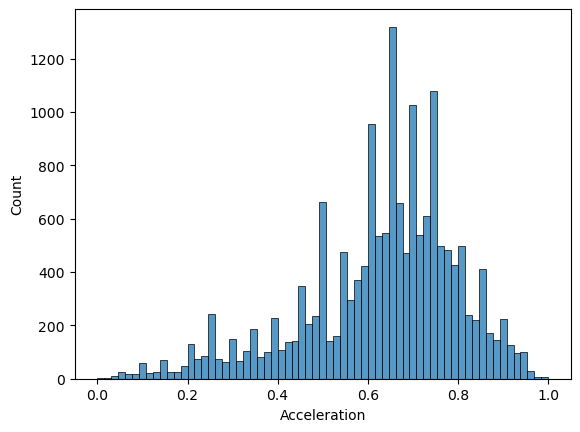

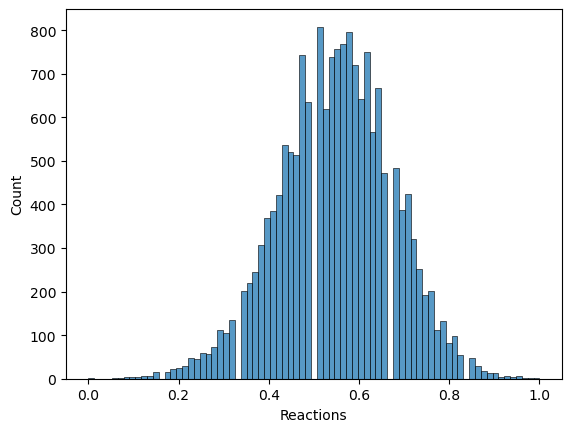

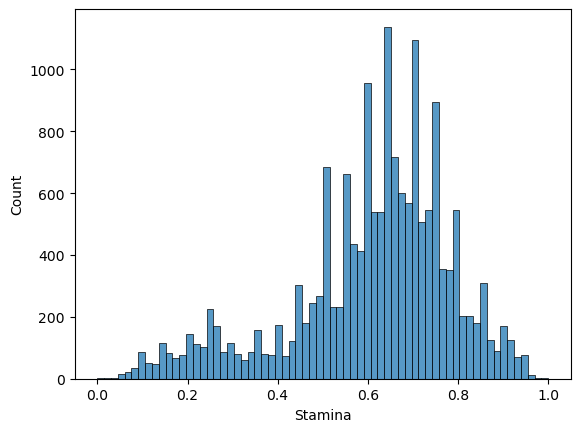

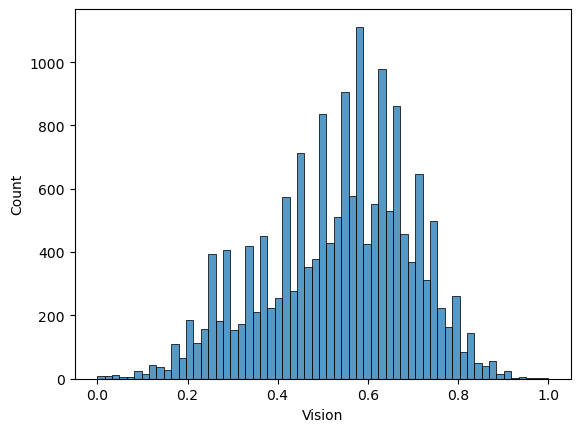

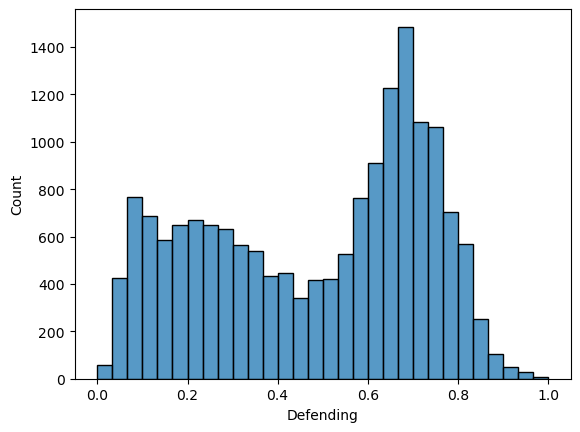

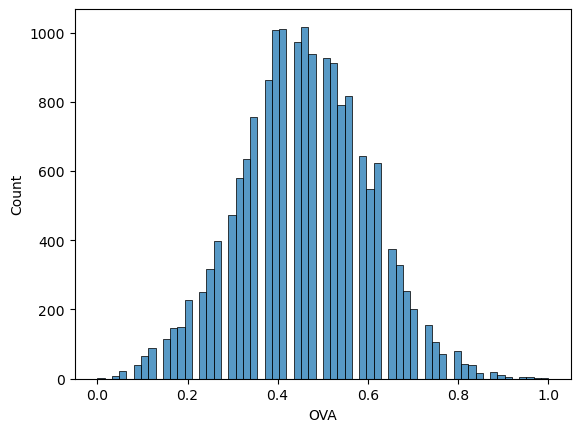

In [1466]:
# Crear una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
df_num_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Imprimir el DataFrame normalizado
print(df_num_norm)

# Crear gráficos de distribución de las variables numéricas normalizadas
for column in df_num_norm.columns:
    sns.histplot(df_num_norm[column])
    plt.show()

Los datos categoricos no son contemplados en la Regresión Lineal, para poder utilizarlo debemos realizar la Codificacion de variables llamada Dummies. Estos convierten variables categóricas en una representación numérica. Esta técnica es especialmente útil cuando se trabaja con algoritmos de aprendizaje automático que requieren variables numéricas como entrada.

In [1467]:
#para sacar dummies vamos a usar la liberería OneHotEncoder

encoder=OneHotEncoder(handle_unknown='error', drop="first").fit(df_obj)
encoder.categories_
encoded=encoder.transform(df_obj).toarray()

# Get the feature names of the encoded variables
feature_names = encoder.get_feature_names_out(df_obj.columns)

# Convert the encoded array to a DataFrame with column names
X_cat_encoded = pd.DataFrame(encoded, columns=feature_names)

# Drop the original categorical columns from the original DataFrame
datatest_obj = df_obj.drop(df_obj.columns, axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
datatest_obj = pd.concat([datatest_obj, X_cat_encoded], axis=1)

# Visualization of code
datatest_obj

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1973,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1468]:
conc_df = pd.concat([df_num_norm, datatest_obj], axis=1)

In [1469]:
conc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             17067 non-null  float64
 1   Altura          17067 non-null  float64
 2   Weight          17067 non-null  float64
 3   Value           17067 non-null  float64
 4   Wage            17067 non-null  float64
 5   Release Clause  17067 non-null  float64
 6   Attacking       17067 non-null  float64
 7   Crossing        17067 non-null  float64
 8   Finishing       17067 non-null  float64
 9   Short Passing   17067 non-null  float64
 10  Ball Control    17067 non-null  float64
 11  Acceleration    17067 non-null  float64
 12  Reactions       17067 non-null  float64
 13  Stamina         17067 non-null  float64
 14  Vision          17067 non-null  float64
 15  Defending       17067 non-null  float64
 16  OVA             17067 non-null  float64
 17  BP_CB           17067 non-null 

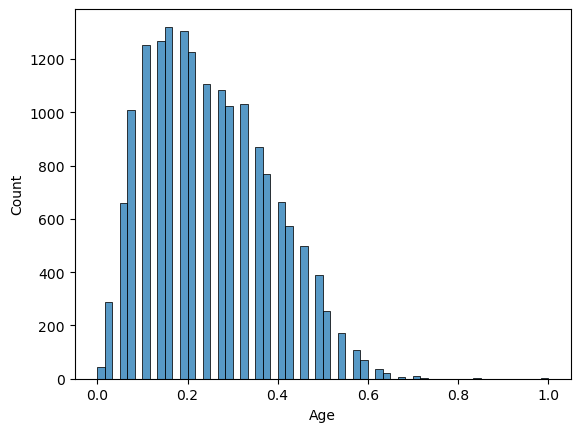

In [1473]:
conc_df.OVA.value_counts()

sns.histplot(conc_df["Age"])
plt.show()

In [1471]:
#Luego de integrados los DataFrames realizamos la regresión lineal del modelo

Y=conc_df['OVA']
X=conc_df['Age']
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

MissingDataError: exog contains inf or nans